In [69]:
import cv2 as cv
from IPython.display import Image
from matplotlib import pyplot as plt
import numpy as np

def plot_img(img: np.ndarray) -> None:
    plt.figure(figsize=(20,6))
    plt.imshow(img)


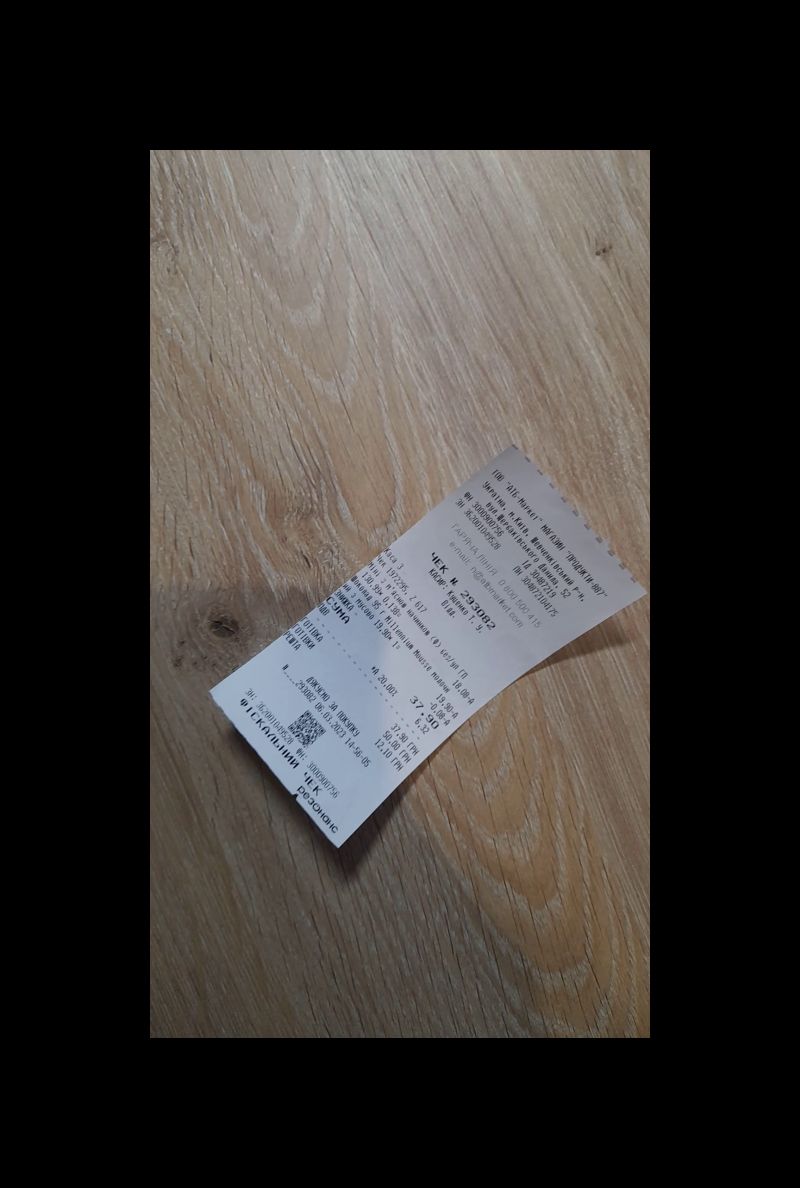

In [70]:
Image(filename='/files_storage/dd54c207-b62e-4d61-bd05-16c2666cfc1e.png') 

In [71]:
img = cv.imread('/files_storage/5d187849-75e7-42e0-9916-4a7eb5816191.png')

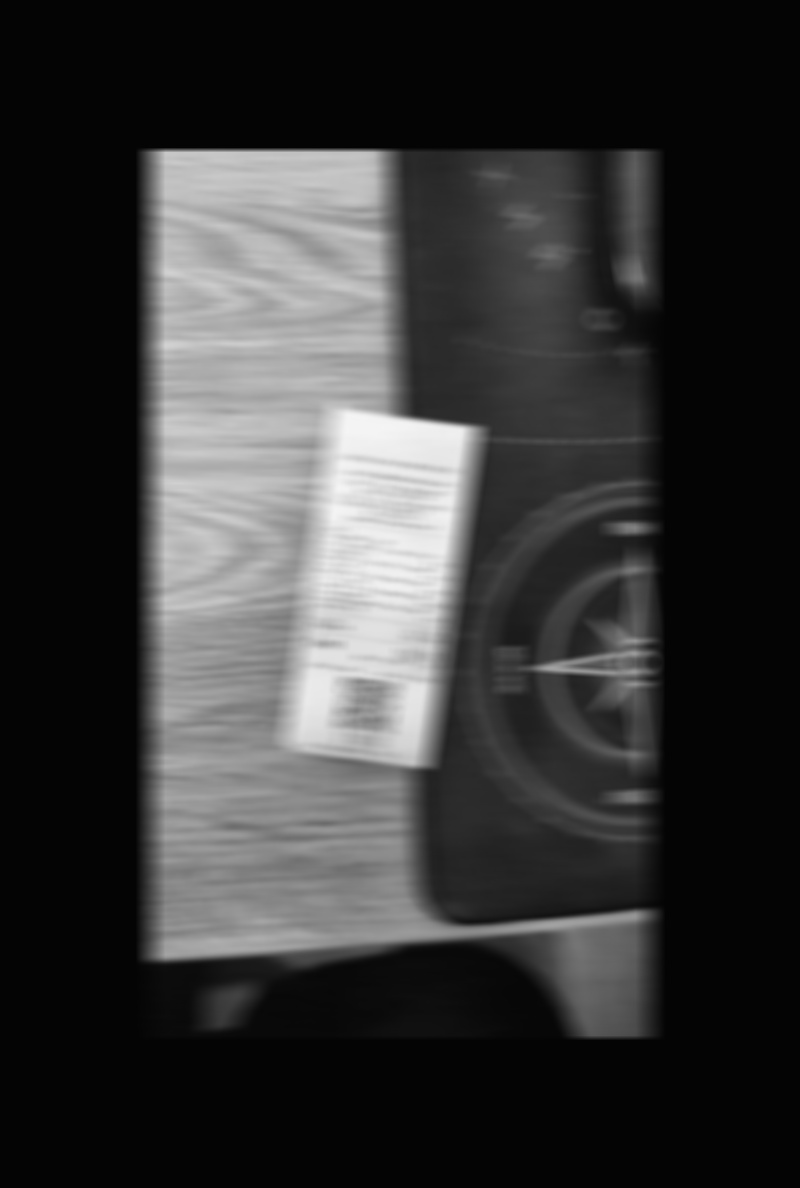

In [72]:


def transform(img: np.ndarray) -> np.ndarray:
    # rgb_planes = cv.split(img)

    # result_planes = []
    # result_norm_planes = []
    # for plane in rgb_planes:
    #     dilated_img = cv.dilate(plane, np.ones((7,7), np.uint8))
    #     bg_img = cv.medianBlur(dilated_img, 21)
    #     diff_img = 255 - cv.absdiff(plane, bg_img)
    #     norm_img = cv.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX, dtype=cv.CV_8UC1)
    #     # result_planes.append(diff_img)
    #     result_norm_planes.append(norm_img)
    
    # # img = cv.merge(result_planes)
    # img = cv.merge(result_norm_planes)

    img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    ksize = (30,5)
    img = cv.blur(img, ksize) 

    return img

# converting to LAB color space
lab= cv.cvtColor(img, cv.COLOR_BGR2LAB)
l_channel, a, b = cv.split(lab)

# Applying CLAHE to L-channel
# feel free to try different values for the limit and grid size:
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl = clahe.apply(l_channel)

# merge the CLAHE enhanced L-channel with the a and b channel
limg = cv.merge((cl,a,b))

# Converting image from LAB Color model to BGR color spcae
img = cv.cvtColor(limg, cv.COLOR_LAB2BGR)

# Stacking the original image with the enhanced image
# img = np.hstack((img, enhanced_img))

img = transform(img)
cv.imwrite('data/result.jpg', img)
Image(filename='data/result.jpg') 